In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Cleaning the Dataset**

In [ ]:
!ls /content/drive/MyDrive/


'12sci. Phy.Journal.pdf'
 17073385337575637237461741988899.jpg
'31-10-2020-084952101 Essays That Will Change The Way You Think - Brianna Wiest.pdf'
'AnyBooks.ver.3.23.0.build.30003403 (1).apk'
'Blinkit Capstone Project.gdoc'
'Colab Notebooks'
'cooganmichael_7083932_133794123_AFR Assignment 2.gdoc'
'Copy of Lamiya Laxmidhar - Cover Letter.gdoc'
'Crayons Classifier Project.gdoc'
'CRIMINOLOGY CLASS NOTES:.gdoc'
'Garon ppt.gdoc'
'Google Keep Document.gdoc'
"I am sharing 'Lamiya. Laxmidhar resume' with you.pdf"
 image001.png
'Lamiya '
'Lamiya Laxmidhar - Cover Letter.gdoc'
'Lamiya Playment Plan.gdoc'
'Lamiya Playment Plan.pdf'
'Laxmidhar Burhan English Ekam kasoti Paper.pdf'
 Letter.pdf
'Machine Learning Project - Crayons Classification.gdoc'
'Michael Tatta - Cover Letter.gdoc'
'Michael Tatta - Cover Letter.pdf'
 MLP
 NPtIygR0zP7DvaCLIrg5n-VObNyNSQA0IhGrOOW1dh1JaErqaM2_t7h_5soRD2Nj-6jk7bCwR_8bqD0aL-4T0RWJAJQwM6SSGOcNVOuSfyPLYjscY0kP0C_LhS2TfUPx9EQOIg6KhwPcjKSygPt7FMeBLpaNOa0P7jnt3ZlMDQGAy1j

In [ ]:
!ls "/content/drive/MyDrive/MLP/Data"


Anger  Calm  Fear  Happy  Sad


## Import the Libraries

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Setting Up Data Directory

In [ ]:
data_dir = "/content/drive/MyDrive/MLP/Data"

# Image Data Generator

In [ ]:
# Step 2: Create an ImageDataGenerator for training (you can add validation split)
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% of data for validation
)


# Load Training Images

In [ ]:
# Step 3: Load training images
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),  # Resize images
    batch_size=32,
    class_mode='categorical',
    subset='training',  # Use 80% for training
    shuffle=True
)


Found 165 images belonging to 5 classes.


# Check the class distribution

Happy: 73 images
Sad: 31 images
Calm: 46 images
Fear: 33 images
Anger: 27 images


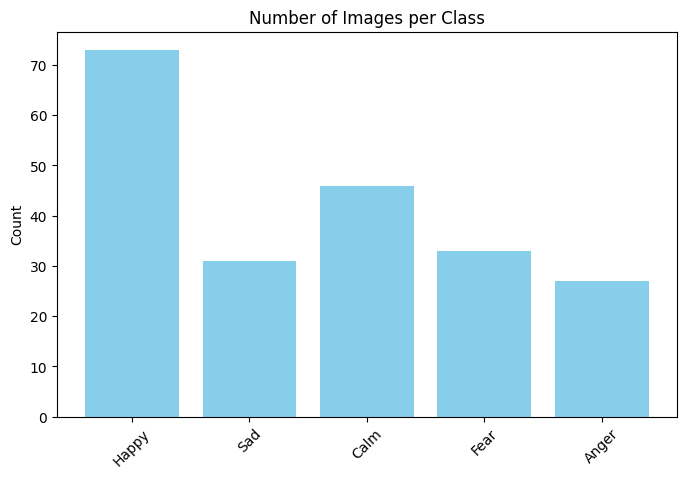

In [ ]:
import os
import matplotlib.pyplot as plt

# Path to your dataset
data_dir = "/content/drive/MyDrive/MLP/Data"  # update if different

# Get class names
classes = os.listdir(data_dir)
class_counts = {}

# Count images per class
for cls in classes:
    cls_path = os.path.join(data_dir, cls)
    if os.path.isdir(cls_path):
        class_counts[cls] = len(os.listdir(cls_path))

# Print counts
for cls, count in class_counts.items():
    print(f"{cls}: {count} images")

# Visualize counts
plt.figure(figsize=(8,5))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title("Number of Images per Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


# Remove the Augmented Folder

In [ ]:
import shutil
import os

# Path to the augmented folder
augmented_folder = "/content/drive/MyDrive/MLP/Data/augmented"

# Check if it exists, then remove
if os.path.exists(augmented_folder):
    shutil.rmtree(augmented_folder)
    print("✅ 'augmented' folder removed.")
else:
    print("No 'augmented' folder found.")


No 'augmented' folder found.


In [ ]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data_dir = "/content/drive/MyDrive/MLP/Data"  # Path to the folder containing emotion subfolders


In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% for validation
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 165 images belonging to 5 classes.
Found 40 images belonging to 5 classes.


# Build the CNN

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 emotions
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,307,589 (4.99 MB)

 Trainable params: 1,307,141 (4.99 MB)

 Non-trainable params: 448 (1.75 KB)

# Train the Model

In [ ]:
# --- Step 3: Train the Model ---
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30  # increase if needed
)

Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.2824 - loss: 3.6278 - val_accuracy: 0.3500 - val_loss: 1.5648
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 955ms/step - accuracy: 0.3836 - loss: 3.8852 - val_accuracy: 0.3500 - val_loss: 1.5723
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 990ms/step - accuracy: 0.3728 - loss: 3.0384 - val_accuracy: 0.2750 - val_loss: 1.5336
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 833ms/step - accuracy: 0.4095 - loss: 2.3951 - val_accuracy: 0.2750 - val_loss: 1.5950
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 859ms/step - accuracy: 0.4060 - loss: 2.6073 - val_accuracy: 0.2500 - val_loss: 1.6819
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 740ms/step - accuracy: 0.4682 - loss: 2.1802 - val_accuracy: 0.2000 - val_loss: 1.9251
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 980ms/step - accuracy: 0.3949 - loss: 2.3167 - val_accuracy: 0.1500 - val_loss: 2.5679
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 776ms/step - accuracy: 0.4369 - loss: 2.1784 - val_accuracy: 0.2000 - val_loss: 

# Plot Accuracy and Loss

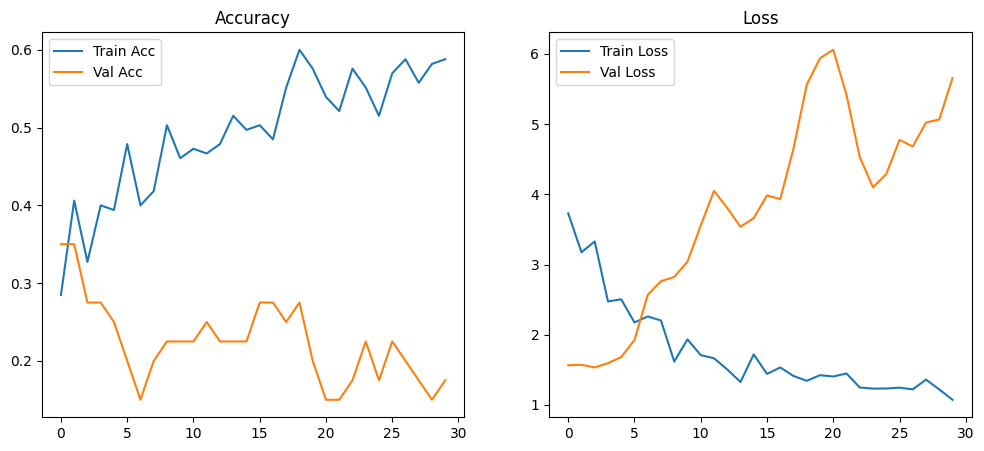

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = "/content/drive/MyDrive/MLP/Data"  # Change path if needed

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80% train, 20% validation
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Separate TEST generator from validation (optional but better)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # important for confusion matrix
)


Found 165 images belonging to 5 classes.
Found 40 images belonging to 5 classes.
Found 205 images belonging to 5 classes.


In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"✅ Test Accuracy: {test_acc*100:.2f}%")


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 407ms/step - accuracy: 0.1981 - loss: 4.8386
✅ Test Accuracy: 19.02%


Found 165 images belonging to 5 classes.
Found 40 images belonging to 5 classes.
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.3178 - loss: 5.0102 - val_accuracy: 0.3500 - val_loss: 1.5963 - learning_rate: 0.0010
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.4157 - loss: 3.7510 - val_accuracy: 0.4000 - val_loss: 1.5767 - learning_rate: 0.0010
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.5002 - loss: 3.4813 - val_accuracy: 0.1500 - val_loss: 2.2184 - learning_rate: 0.0010
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.4430 - loss: 3.2180 - val_accuracy: 0.2750 - val_loss: 1.6490 - learning_rate: 0.0010
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4511 - loss: 2.6583
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.4559 - loss: 2.6146 - val_accuracy: 0.1750 - val_loss: 1.8048 - learning_rate: 0.0010
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━

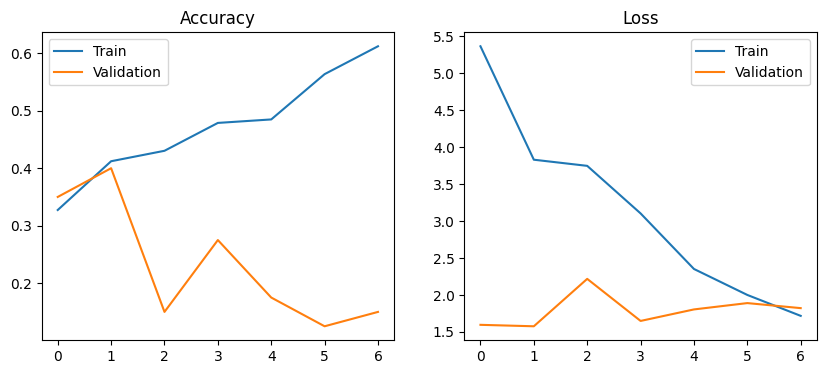

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# --- Paths ---
train_dir = "/content/drive/MyDrive/MLP/Data"  # Make sure path matches your Drive folder

# --- Data Augmentation ---
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# --- CNN Model ---
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# --- Compile ---
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# --- Callbacks ---
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, verbose=1)

# --- Train ---
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stop, reduce_lr]
)

# --- Evaluate ---
loss, acc = model.evaluate(val_generator)
print(f"✅ Validation Accuracy: {acc*100:.2f}%")
print(f"✅ Validation Loss: {loss:.4f}")

# --- Plot training history ---
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.title("Loss")
plt.show()


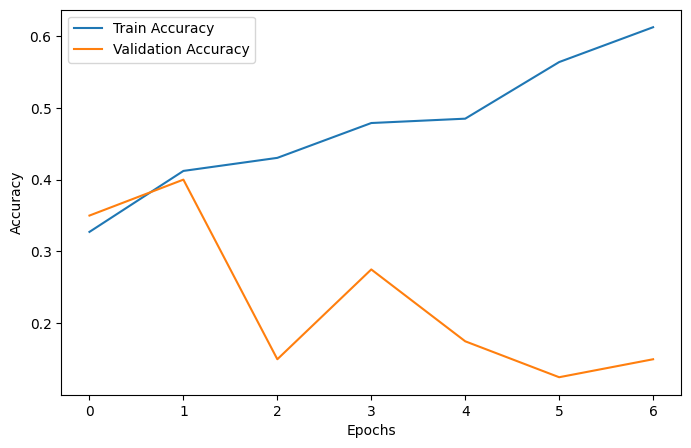

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


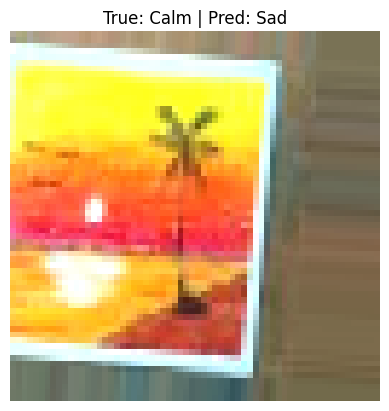

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get one random batch
x_batch, y_batch = next(val_generator)

# Pick a random index from the batch
idx = np.random.randint(0, len(x_batch))

# Get image and label
image = x_batch[idx]
true_label = np.argmax(y_batch[idx])
pred_probs = model.predict(np.expand_dims(image, axis=0))
pred_label = np.argmax(pred_probs)

# Map indices to class names
class_labels = list(val_generator.class_indices.keys())

# Show image
plt.imshow(image)
plt.axis('off')
plt.title(f"True: {class_labels[true_label]} | Pred: {class_labels[pred_label]}")
plt.show()


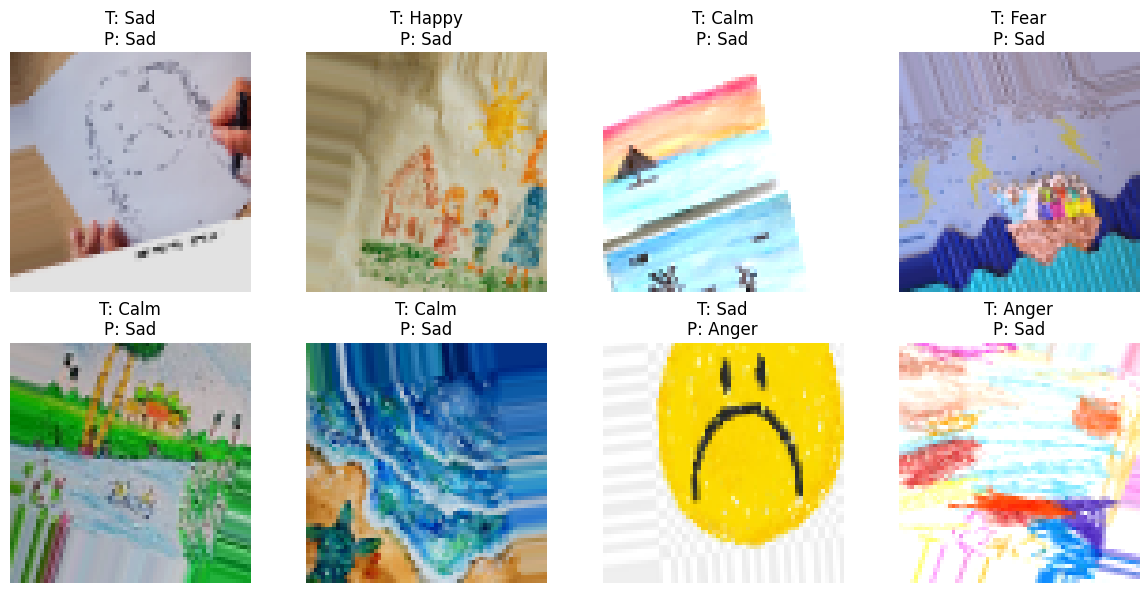

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(12,6))

for ax in axes.flatten():
    idx = np.random.randint(0, len(x_batch))
    image = x_batch[idx]
    true_label = np.argmax(y_batch[idx])
    pred_probs = model.predict(np.expand_dims(image, axis=0), verbose=0)
    pred_label = np.argmax(pred_probs)

    ax.imshow(image)
    ax.axis('off')
    ax.set_title(f"T: {class_labels[true_label]}\nP: {class_labels[pred_label]}")

plt.tight_layout()
plt.show()
